In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
predictions = np.squeeze(np.load('predictions.npy'), axis=-1).T
prediction_start_timestep = 20500
actual = np.squeeze(np.load('../kuramoto_sivashinsky/trajectories/trajectory_0.npy'), axis=-1).T
actual = actual[:, prediction_start_timestep:prediction_start_timestep+predictions.shape[1]]
print(predictions.shape, actual.shape)

(128, 2000) (128, 2000)


Text(0.5, 0.98, 'Forecasting the Kuramoto-Sivashinsky system ($L=100$) \nwith parallel reservoir computing')

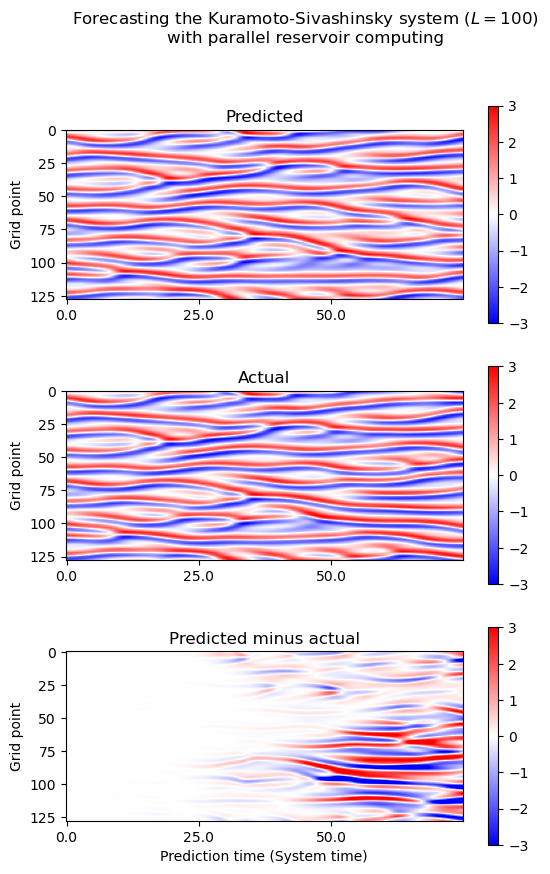

In [3]:
timestep = 0.25
t = np.arange(0, timestep*predictions.shape[1], timestep)

start = 0
num = 300

fig, axs = plt.subplots(3, 1, figsize=(6.4, 9.6))

cax0 = axs[0].imshow(predictions[:, start:start+num], cmap='bwr', vmin=-3, vmax=3)
cax1 = axs[1].imshow(actual[:, start:start+num], cmap='bwr', vmin=-3, vmax=3)
cax2 = axs[2].imshow(predictions[:, start:start+num] - actual[:, start:start+num], cmap='bwr', vmin=-3, vmax=3)

for i in range(3):
    ax = axs[i]
    pixels_per_tick = 100
    tick_positions = np.arange(0, len(t[start:start+num]), pixels_per_tick)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(np.around(t[start:start+num][tick_positions], decimals=1))
    fig.colorbar(cax0, ax=ax)
    ax.set_aspect(1)
    ax.set_ylabel('Grid point')


axs[0].set_title('Predicted')
axs[1].set_title('Actual')
axs[2].set_title('Predicted minus actual')

axs[2].set_xlabel('Prediction time (System time)')

# plt.tight_layout()
plt.suptitle('Forecasting the Kuramoto-Sivashinsky system ($L=100$) \nwith parallel reservoir computing')
